In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filename = r"C:\Users\BenBuczek\Downloads\diamond\diamonds.csv"
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [2]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()        

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [4]:
#missing values by column
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
cut,0,0.0
meas_length,0,0.0
fancy_color_intensity,0,0.0
fancy_color_overtone,0,0.0
fancy_color_secondary_color,0,0.0
fancy_color_dominant_color,0,0.0
fluor_intensity,0,0.0
fluor_color,0,0.0
girdle_max,0,0.0
girdle_min,0,0.0


In [5]:
#looking for other other values that indicate the same as null
data['eye_clean'].unique()

array(['unknown', 'Yes', 'E1', 'Borderline', 'No'], dtype=object)

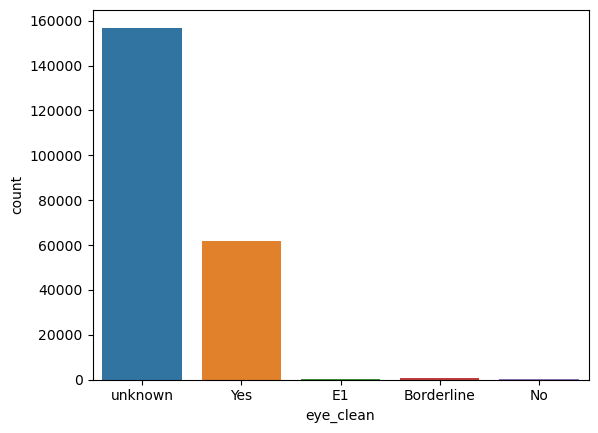

unknown       156916
Yes            61931
Borderline       515
E1               300
No                41
Name: eye_clean, dtype: int64


In [6]:
sns.countplot(data=data, x='eye_clean')

plt.show()
print(data['eye_clean'].value_counts())

In [7]:
unknown_percentages = {}

# Calculate 'unknown' percentage for each column in the dataframe
for col in data.columns:
    total_count = data.shape[0]
    unknown_count = data[data[col].astype(str).str.lower() == "unknown"].shape[0]
    percentage = (unknown_count / total_count) * 100
    if unknown_count > 0:
        unknown_percentages[col] = percentage

# Sort columns by percentage of 'unknown' values in descending order
sorted_unknown_percentages = dict(sorted(unknown_percentages.items(), key=lambda item: item[1], reverse=True))

sorted_unknown_percentages

{'fancy_color_secondary_color': 99.5166201644948,
 'fancy_color_overtone': 99.07238408214725,
 'fancy_color_intensity': 95.82982480894663,
 'fancy_color_dominant_color': 95.82891448910574,
 'culet_condition': 93.02740517880957,
 'fluor_color': 92.84215509119129,
 'eye_clean': 71.42187407545642,
 'culet_size': 39.02541157835805,
 'girdle_max': 38.367705493325076,
 'girdle_min': 37.974902481987044,
 'cut_quality': 27.58587729798865,
 'color': 4.170175191053377,
 'fluor_intensity': 0.058260469816069874}

it looks like we may drop some columns entirely based upon the high number of unknown values.

In [8]:
# Columns to drop
columns_to_drop = [col for col, percentage in sorted_unknown_percentages.items() if percentage > 70]

# Drop these columns
data = data.drop(columns=columns_to_drop)

data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,None,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,None,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,None,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,None,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,None,200


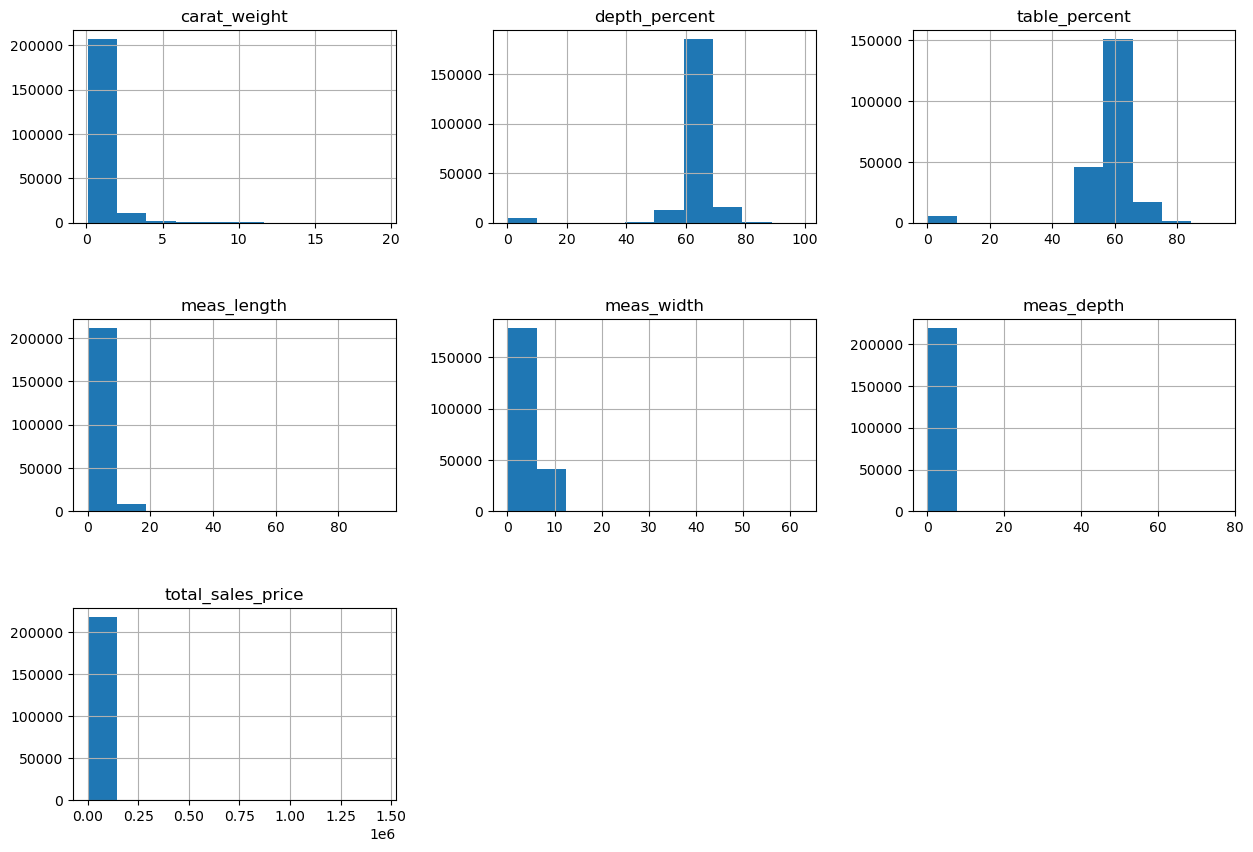

In [9]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

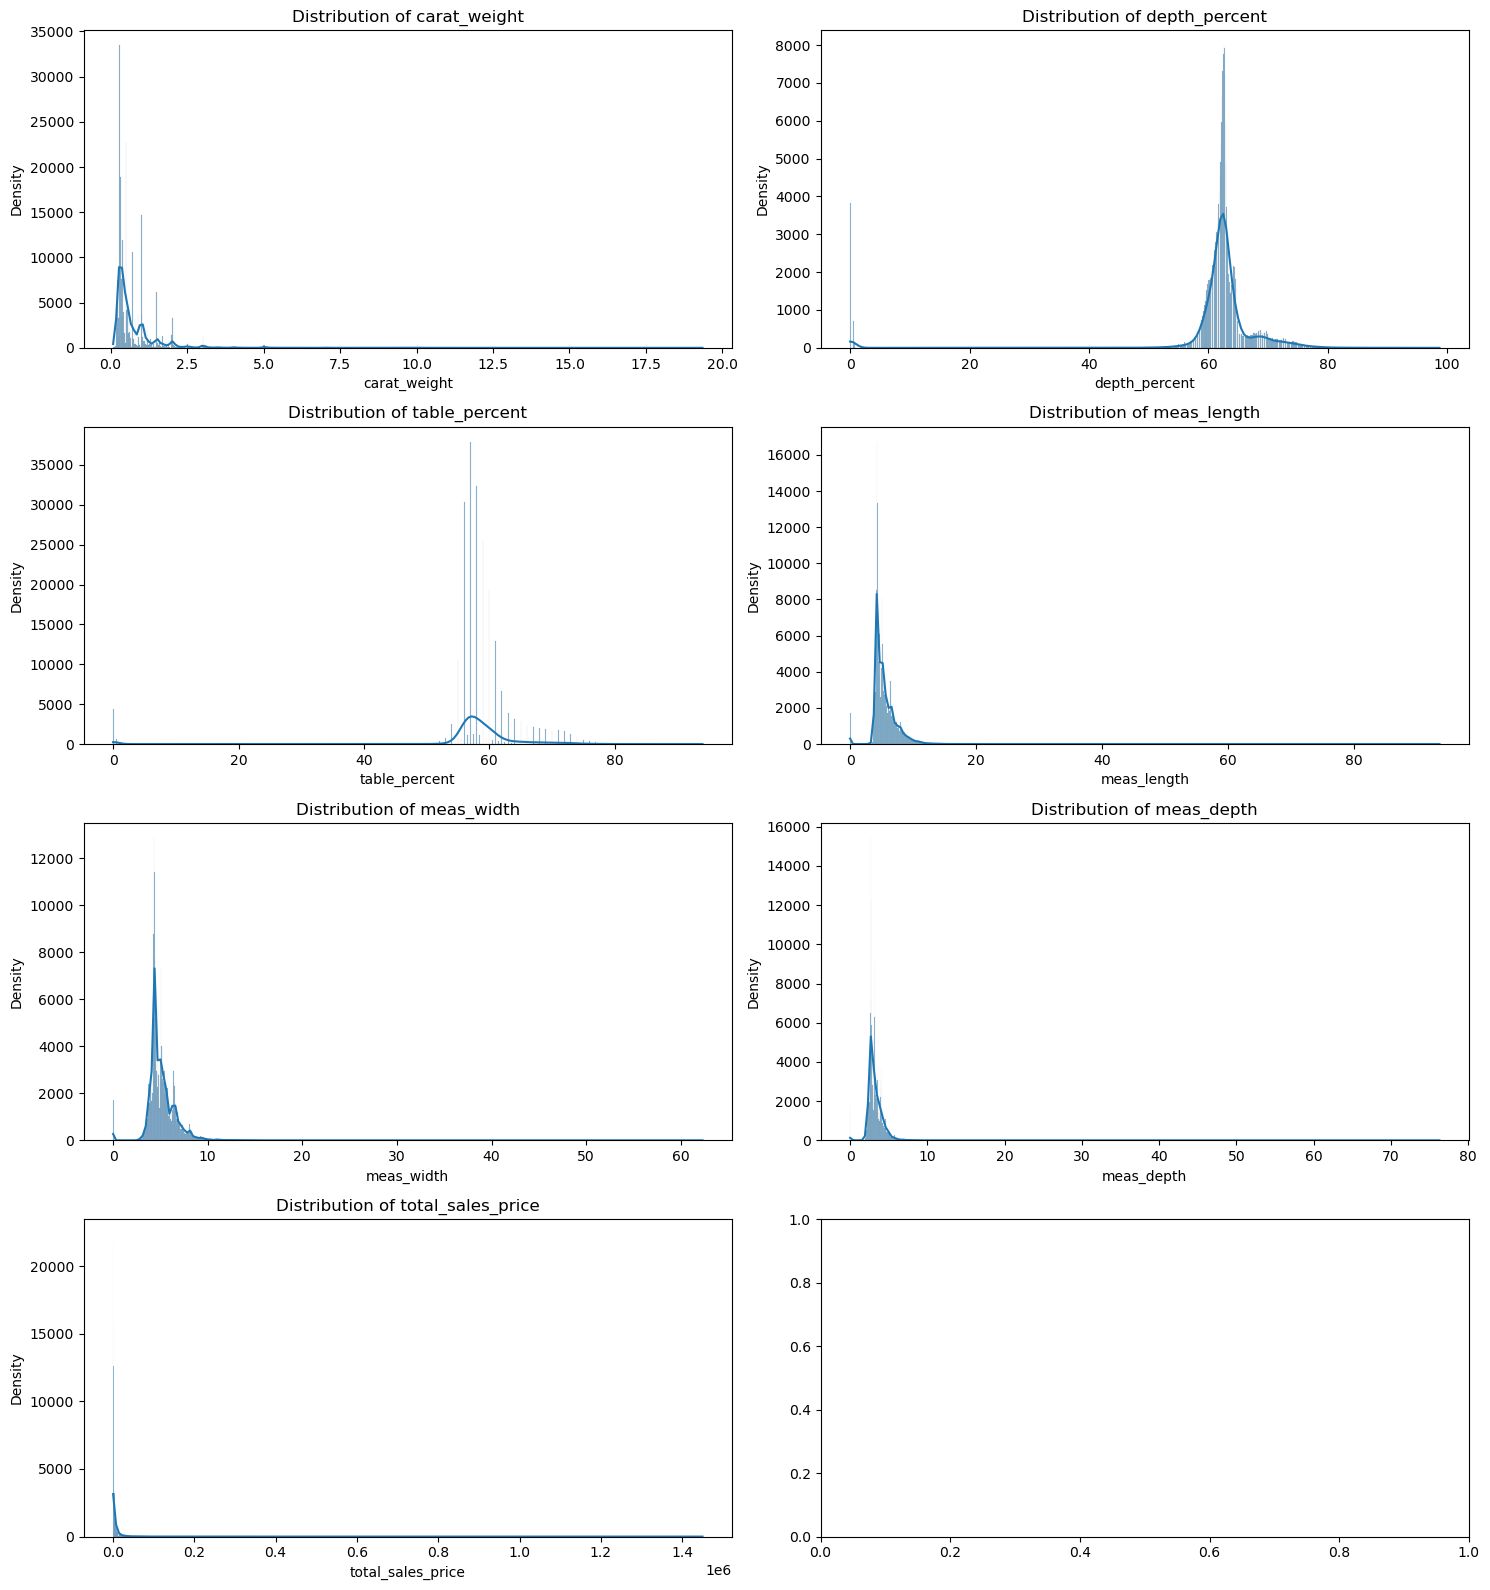

In [10]:
# Identify numeric columns
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

# Set up the number of rows and columns for subplots based on the number of numeric columns.
n_cols = 2
n_rows = int(len(numeric_columns) / n_cols) + (len(numeric_columns) % n_cols)

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# Ensure axes is always a 2D array
if n_rows == 1:
    axes = axes.reshape(1, -1)

# Create a distribution plot for each numeric column
for idx, col in enumerate(numeric_columns):
    curr_row, curr_col = divmod(idx, n_cols)
    ax = axes[curr_row, curr_col]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Density')
    ax.set_xlabel(col)


plt.tight_layout()
plt.show()


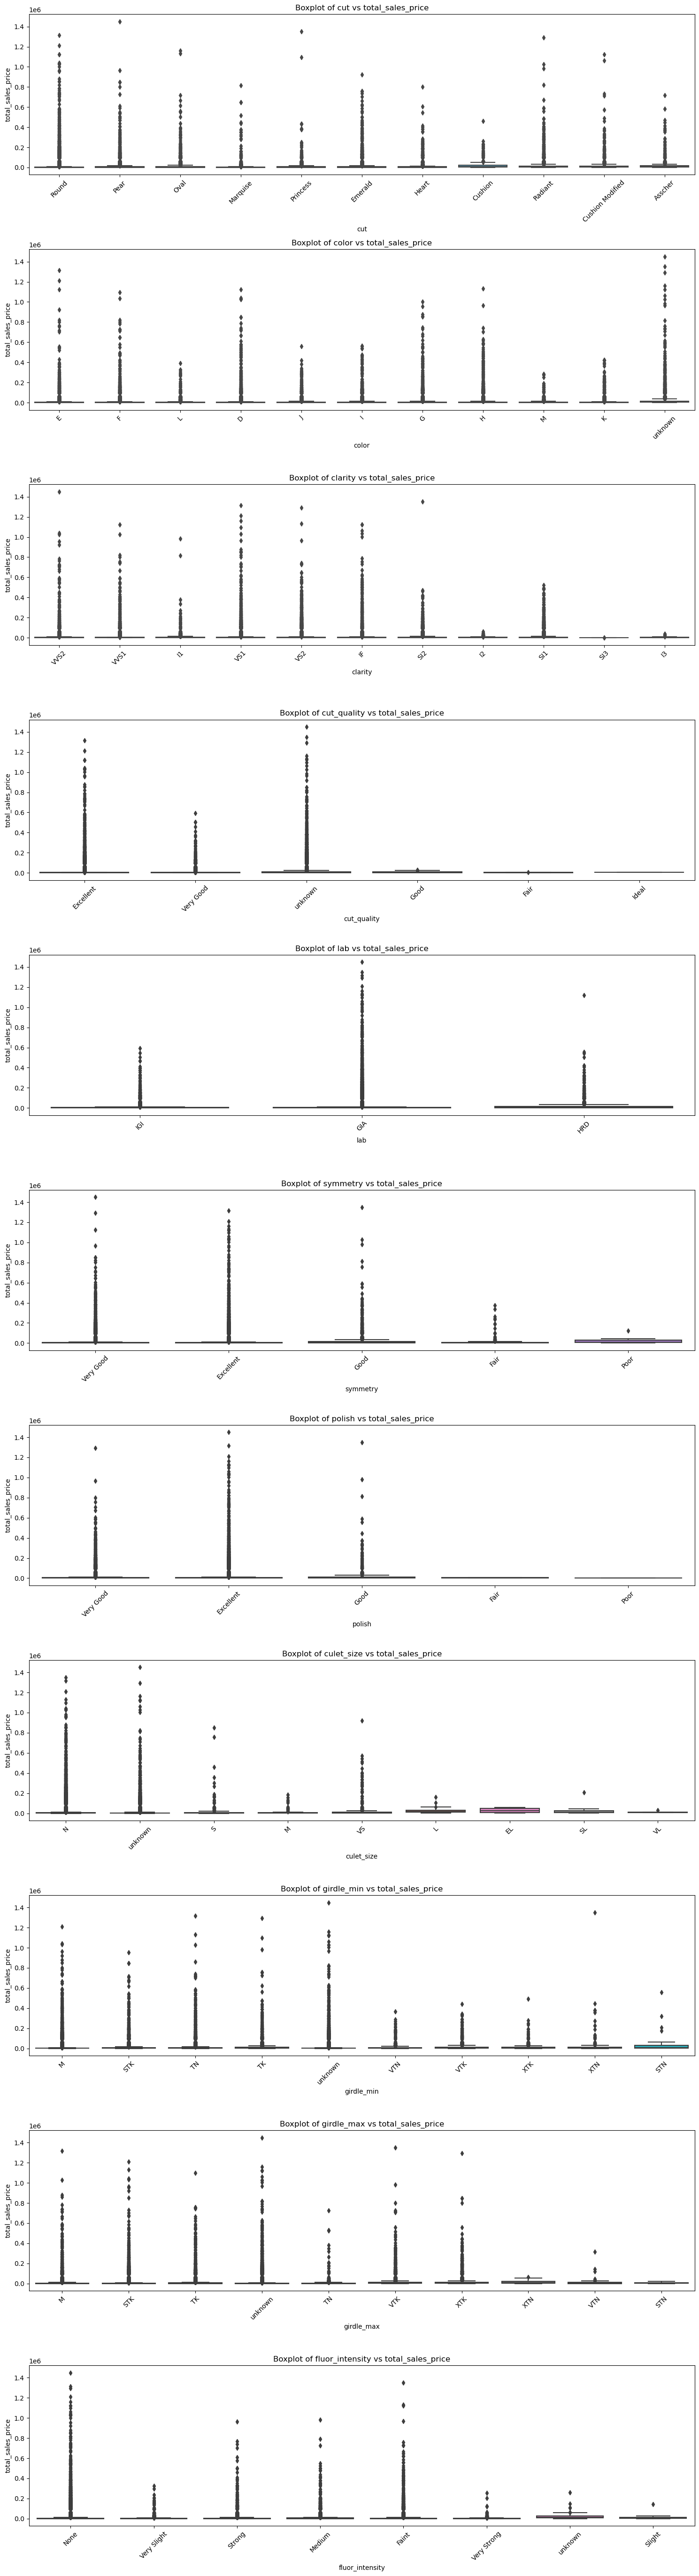

In [11]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and col != 'total_sales_price']

# Set up the figure size
plt.figure(figsize=(15, 5 * len(categorical_columns)))

# Create a boxplot for each categorical column vs total_sales_price
for idx, cat_col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, idx + 1)
    sns.boxplot(x=cat_col, y='total_sales_price', data=data)
    plt.title(f"Boxplot of {cat_col} vs total_sales_price")
    plt.xticks(rotation=45)
    plt.ylabel('total_sales_price')
    plt.xlabel(cat_col)

plt.tight_layout()
plt.show()


In [15]:
data.to_csv(r"C:\Users\BenBuczek\OneDrive - KIPP New Orleans, Inc\Desktop\Springboard/clean_diamond_data.csv", index=False)